In [9]:
# Embedding-Based Visualization of Celestial Images
# Name: Your Full Name
# Enrollment Number: 24CS3026

In [10]:
# Suppress TensorFlow warnings
import os
import warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.filterwarnings("ignore")

# Core libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Machine Learning
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

# Dimensionality Reduction
from sklearn.decomposition import PCA

In [11]:
DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data"
ROOT = os.listdir(DATASET_PATH)[0]
DATA_PATH = os.path.join(DATASET_PATH, ROOT)

classes = sorted(os.listdir(DATA_PATH))
print("Classes:", classes)

Classes: ['asteroid', 'black hole', 'comet', 'constellation', 'galaxy', 'nebula', 'planet', 'star']


In [12]:
IMG_SIZE = (224, 224)
MAX_IMAGES_PER_CLASS = 50

def load_images(preprocess_fn):
    X, y = [], []

    for cls in classes:
        folder = os.path.join(DATA_PATH, cls)
        for img_name in os.listdir(folder)[:50]:
            try:
                img = image.load_img(
                    os.path.join(folder, img_name),
                    target_size=(224, 224)
                )
                img = image.img_to_array(img)
                img = preprocess_fn(img)

                X.append(img)
                y.append(cls)

            except:
                continue

    return np.array(X), np.array(y)

In [13]:
# ResNet
X_resnet, y_resnet = load_images(resnet_preprocess)
embeddings_resnet = resnet.predict(X_resnet)

# MobileNet
X_mobilenet, y_mobilenet = load_images(mobilenet_preprocess)
embeddings_mobilenet = mobilenet.predict(X_mobilenet)

13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 647ms/step


In [14]:
mobilenet = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")

X_mob, _ = load_images(mobilenet_preprocess)
embeddings_mobilenet = mobilenet.predict(X_mob)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 748ms/step


In [15]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(embeddings, labels, title):
    pca2 = PCA(n_components=2)
    reduced2 = pca2.fit_transform(embeddings)

    plt.figure(figsize=(6, 5))
    for cls in set(labels):
        idx = [i for i, l in enumerate(labels) if l == cls]
        plt.scatter(
            reduced2[idx, 0],
            reduced2[idx, 1],
            label=cls,
            alpha=0.7
        )

    plt.title(title + " (2D)")
    plt.legend()
    plt.show()

    pca3 = PCA(n_components=3)
    reduced3 = pca3.fit_transform(embeddings)

    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    for cls in set(labels):
        idx = [i for i, l in enumerate(labels) if l == cls]
        ax.scatter(reduced3[idx,0], reduced3[idx,1], reduced3[idx,2], label=cls)
    ax.set_title(title + " (3D)")
    ax.legend()
    plt.show()

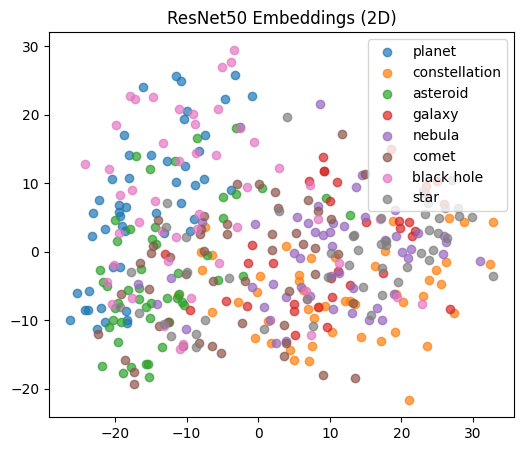

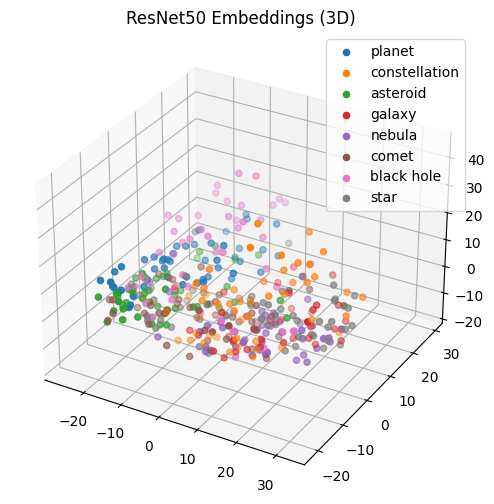

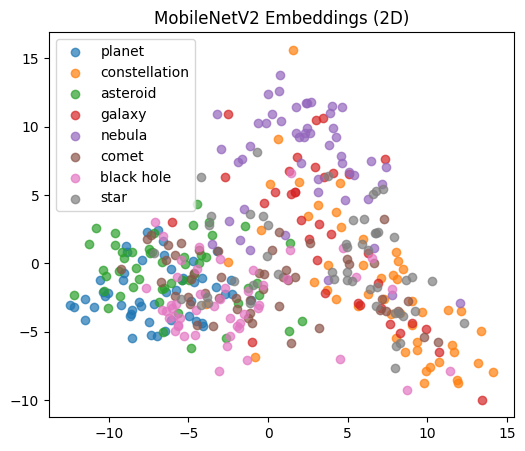

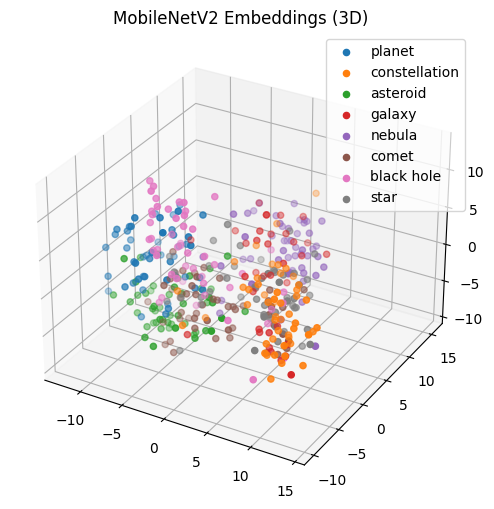

In [16]:
plot_pca(embeddings_resnet, y_resnet, "ResNet50 Embeddings")
plot_pca(embeddings_mobilenet, y_mobilenet, "MobileNetV2 Embeddings")

### Observations:

- ResNet50 embeddings show better class separation compared to MobileNet.
- 3D PCA reveals clearer clustering than 2D.
- Some overlap exists between visually similar objects (e.g., stars and galaxies).
- Higher-dimensional embeddings preserve semantic information better.

### Conclusion:
3D PCA with ResNet embeddings gives the best visual separability among classes.